In [1]:
import os
import pandas as pd
import numpy as np
import preprocess_data as prep
from pandas.api.types import CategoricalDtype
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 14

DATA_PATH = '../cell-profiler/measurements'
FILENAME = 'Nuclei.csv'

In [2]:
measurements = prep.cell_data(data_path=DATA_PATH, cytoplasm=False, biomarkers=False)

Total number of cells processed: 388.0

Check the numbers of cells correspond: True, True

The are no repeated column names: True
The are no repeated column names: True


In [3]:
measurements.head(3)

,label,image,object,combination,site,stiffness,well,area_cell,centerX_cell,centerY_cell,...,sumvariance_wga_02_nucl,sumvariance_wga_03_nucl,variance_dapi_00,variance_dapi_01,variance_dapi_02,variance_dapi_03,variance_wga_00_nucl,variance_wga_01_nucl,variance_wga_02_nucl,variance_wga_03_nucl
0,0.2-B-A1-1-1,1,1,B,1,0.2,A1,33430,413.0,305.0,...,259.823350,243.733537,440.607788,443.542915,439.464592,439.654666,82.459599,74.833296,79.102176,78.482526
1,0.2-B-A1-1-2,1,2,B,1,0.2,A1,17933,781.0,463.0,...,847.930535,861.674067,1319.612357,1296.964050,1308.777073,1334.160892,237.889096,226.145928,233.364850,245.438573
2,0.2-B-A1-1-3,1,3,B,1,0.2,A1,12533,403.0,457.0,...,310.017967,326.073224,563.820396,561.354914,566.985303,584.072045,92.122959,85.681245,91.671808,95.918722


## Examine the data

In [4]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Columns: 290 entries, label to variance_wga_03_nucl
dtypes: category(1), float64(269), int64(14), object(6)
memory usage: 879.6+ KB


### Cells per stiffness value

In [5]:
measurements.groupby('stiffness')[['label']].count()

,label
stiffness,
0.2,84
2.0,164
16.0,96
64.0,44


### Cells per image (density)

In [6]:
cell_numbers = measurements.groupby(['stiffness', 'well', 'site'], as_index=False)[['object']].count()
cell_numbers.groupby('stiffness').mean()

,object
stiffness,
0.2,8.400000
2.0,11.714286
16.0,8.000000
64.0,8.800000


## Clean the data

### Missing values?

In [7]:
(measurements.isnull().sum().sum())

0

### Descriptive statistics

In [8]:
stats = measurements.describe()

In [9]:
pd.options.display.max_columns = measurements.shape[1]
stats

,area_cell,centerX_cell,centerY_cell,centerZ_cell,compactness_cell,eccentricity_cell,eulernumber_cell,extent_cell,formfactor_cell,majoraxislength_cell,maxferetdiameter_cell,maximumradius_cell,meanradius_cell,medianradius_cell,minferetdiameter_cell,minoraxislength_cell,orientation_cell,perimeter_cell,solidity_cell,children_cytoplasm_count_cell,integratedintensityedge_wga_cell,integratedintensity_wga_cell,lowerquartileintensity_wga_cell,madintensity_wga_cell,massdisplacement_wga_cell,maxintensityedge_wga_cell,maxintensity_wga_cell,meanintensityedge_wga_cell,meanintensity_wga_cell,medianintensity_wga_cell,minintensityedge_wga_cell,minintensity_wga_cell,stdintensityedge_wga_cell,stdintensity_wga_cell,upperquartileintensity_wga_cell,loc_centermassintensityX_wga_cell,loc_centermassintensityY_wga_cell,loc_centermassintensityZ_wga_cell,loc_centerX_cell,loc_centerY_cell,loc_centerZ_cell,loc_maxintensityX_wga_cell,loc_maxintensityY_wga_cell,loc_maxintensityZ_wga_cell,anglebetweenneighbors_cell,firstclosestdistance_cell,firstclosestobjectnumber_cell,numberofneighbors_cell,percenttouching_cell,secondclosestdistance_cell,secondclosestobjectnumber_cell,number_object_number_cell,parent_nuclei,angularsecondmoment_wga_00_cell,angularsecondmoment_wga_01_cell,angularsecondmoment_wga_02_cell,angularsecondmoment_wga_03_cell,contrast_wga_00_cell,contrast_wga_01_cell,contrast_wga_02_cell,contrast_wga_03_cell,correlation_wga_00_cell,correlation_wga_01_cell,correlation_wga_02_cell,correlation_wga_03_cell,differenceentropy_wga_00_cell,differenceentropy_wga_01_cell,differenceentropy_wga_02_cell,differenceentropy_wga_03_cell,differencevariance_wga_00_cell,differencevariance_wga_01_cell,differencevariance_wga_02_cell,differencevariance_wga_03_cell,entropy_wga_00_cell,entropy_wga_01_cell,entropy_wga_02_cell,entropy_wga_03_cell,infomeas1_wga_00_cell,infomeas1_wga_01_cell,infomeas1_wga_02_cell,infomeas1_wga_03_cell,infomeas2_wga_00_cell,infomeas2_wga_01_cell,infomeas2_wga_02_cell,infomeas2_wga_03_cell,inversedifferencemoment_wga_00_cell,inversedifferencemoment_wga_01_cell,inversedifferencemoment_wga_02_cell,inversedifferencemoment_wga_03_cell,sumaverage_wga_00_cell,sumaverage_wga_01_cell,sumaverage_wga_02_cell,sumaverage_wga_03_cell,sumentropy_wga_00_cell,sumentropy_wga_01_cell,sumentropy_wga_02_cell,sumentropy_wga_03_cell,sumvariance_wga_00_cell,sumvariance_wga_01_cell,sumvariance_wga_02_cell,sumvariance_wga_03_cell,variance_wga_00_cell,variance_wga_01_cell,variance_wga_02_cell,variance_wga_03_cell,area_nucl,centerX_nucl,centerY_nucl,centerZ_nucl,compactness_nucl,eccentricity_nucl,eulernumber_nucl,extent_nucl,formfactor_nucl,majoraxislength_nucl,maxferetdiameter_nucl,maximumradius_nucl,meanradius_nucl,medianradius_nucl,minferetdiameter_nucl,minoraxislength_nucl,orientation_nucl,perimeter_nucl,solidity_nucl,children_cells_count,children_cytoplasm_count_nucl,integratedintensityedge_dapi,integratedintensityedge_wga_nucl,integratedintensity_dapi,integratedintensity_wga_nucl,lowerquartileintensity_dapi,lowerquartileintensity_wga_nucl,madintensity_dapi,madintensity_wga_nucl,massdisplacement_dapi,massdisplacement_wga_nucl,maxintensityedge_dapi,maxintensityedge_wga_nucl,maxintensity_dapi,maxintensity_wga_nucl,meanintensityedge_dapi,meanintensityedge_wga_nucl,meanintensity_dapi,meanintensity_wga_nucl,medianintensity_dapi,medianintensity_wga_nucl,minintensityedge_dapi,minintensityedge_wga_nucl,minintensity_dapi,minintensity_wga_nucl,stdintensityedge_dapi,stdintensityedge_wga_nucl,stdintensity_dapi,stdintensity_wga_nucl,upperquartileintensity_dapi,upperquartileintensity_wga_nucl,loc_centermassintensityX_dapi,loc_centermassintensityX_wga_nucl,loc_centermassintensityY_dapi,loc_centermassintensityY_wga_nucl,loc_centermassintensityZ_dapi,loc_centermassintensityZ_wga_nucl,loc_centerX_nucl,loc_centerY_nucl,loc_centerZ_nucl,loc_maxintensityX_dapi,loc_maxintensityX_wga_nucl,loc_maxintensityY_dapi,loc_maxintensityY_wga_nucl,loc_maxintensityZ_dapi,loc_maxintensityZ_wga_nucl,ang

In [10]:
measurements.describe(include=['object'])

,label,image,object,combination,site,well
count,388,388,388,388,388,388
unique,388,41,18,1,7,3
top,2.0-B-A2-2-8,11,1,B,2,A1
freq,1,18,41,388,90,196


### Drop features with zero variance

In [11]:
list(stats.columns[stats.loc['std', :] == 0])

['centerZ_cell',
 'children_cytoplasm_count_cell',
 'loc_centermassintensityZ_wga_cell',
 'loc_centerZ_cell',
 'loc_maxintensityZ_wga_cell',
 'centerZ_nucl',
 'eulernumber_nucl',
 'children_cells_count',
 'children_cytoplasm_count_nucl',
 'loc_centermassintensityZ_dapi',
 'loc_centermassintensityZ_wga_nucl',
 'loc_centerZ_nucl',
 'loc_maxintensityZ_dapi',
 'loc_maxintensityZ_wga_nucl']

In [12]:
measurements.drop(stats.columns[stats.loc['std', :] == 0], axis=1, inplace=True)

### Drop duplicates

In [13]:
dupl_cols = ['parent_nuclei', 'number_object_number_cell', 'number_object_number_nucl']
[measurements.drop([col], axis=1, inplace=True) for col in dupl_cols if sum(measurements.object.astype(int) != measurements[col])==0]

[None, None, None]

In [14]:
print("The dataset after cleaning has {} rows and {} columns.".format(measurements.shape[0], measurements.shape[1]))
measurements.dtypes.value_counts()

The dataset after cleaning has 388 rows and 273 columns.


float64     260
object        6
int64         6
category      1
dtype: int64

In [15]:
list(measurements.columns)

['label',
 'image',
 'object',
 'combination',
 'site',
 'stiffness',
 'well',
 'area_cell',
 'centerX_cell',
 'centerY_cell',
 'compactness_cell',
 'eccentricity_cell',
 'eulernumber_cell',
 'extent_cell',
 'formfactor_cell',
 'majoraxislength_cell',
 'maxferetdiameter_cell',
 'maximumradius_cell',
 'meanradius_cell',
 'medianradius_cell',
 'minferetdiameter_cell',
 'minoraxislength_cell',
 'orientation_cell',
 'perimeter_cell',
 'solidity_cell',
 'integratedintensityedge_wga_cell',
 'integratedintensity_wga_cell',
 'lowerquartileintensity_wga_cell',
 'madintensity_wga_cell',
 'massdisplacement_wga_cell',
 'maxintensityedge_wga_cell',
 'maxintensity_wga_cell',
 'meanintensityedge_wga_cell',
 'meanintensity_wga_cell',
 'medianintensity_wga_cell',
 'minintensityedge_wga_cell',
 'minintensity_wga_cell',
 'stdintensityedge_wga_cell',
 'stdintensity_wga_cell',
 'upperquartileintensity_wga_cell',
 'loc_centermassintensityX_wga_cell',
 'loc_centermassintensityY_wga_cell',
 'loc_centerX_cell'

In [ ]:
centre_cols = ['centerX_cell', 'loc_centerX_cell']
print("Centre coordinates")
print(measurements[centre_cols].head(3), '\n')

print("Intensity-weighted centroid")
print(measurements['loc_centermassintensityX_wga_cell'].head(3), '\n')

print("Mass displacement")
print(measurements['massdisplacement_wga_cell'].head(10))

(abs(measurements['loc_centermassintensityX_wga_cell'] - measurements['loc_centerX_cell'])).head(10)

## Feature selection

### Define feature columns

In [16]:
# Dataset with reduced number of features
measurements_ = measurements.copy()
measurements_['stiffness_num'] = pd.to_numeric(measurements_.stiffness)

In [17]:
numeric_cols = measurements_.select_dtypes(include=[np.number]).columns
feature_cols = measurements_.select_dtypes(include=[np.number]).drop(['stiffness_num'], axis=1).columns

Plate-layout-effect and batch-effect corrections

> To add heat maps of the correlations between all of wells within an experiment.

### Correlations between replicates

In [18]:
measurements_.groupby(['stiffness_num', 'well']).sum()

area_cell  centerX_cell  centerY_cell  compactness_cell  \
stiffness_num well                                                            
0.2           A1       857932       19673.0       17326.0         72.266755   
              A2       241035        6919.0        6100.0         23.817689   
              A3       520465       16218.0       15532.0         55.585736   
2.0           A1      1641649       39165.0       37521.0        163.538358   
              A2       834214       22464.0       25243.0         94.055138   
              A3       757002       18090.0       19604.0         74.877781   
16.0          A1       885198       22456.0       21210.0        108.343568   
              A2      1250624       23561.0       22148.0         89.437677   
              A3       352571        5679.0        6587.0         34.490502   
64.0          A1       637377       24080.0       19725.0         81.336686   

                    eccentricity_cell  eulernumber_cell  extent_cell  \
stiffness_num well                                                     
0.2           A1            30.627356              37.0    18.705711   
              A2            11.081378              13.0     6.524471   
              A3            26.445924              34.0    18.562282   
2.0           A1            64.417012              74.0    34.462602   
              A2            40.059359              50.0    25.709526   
              A3            31.507524              38.0    18.579390   
16.0          A1            33.081070              39.0    15.731061   
              A2            38.437627              44.0    18.323743   
              A3            11.904731              13.0     4.708832   
64.0          A1            35.157998              44.0    21.346799   

                    formfactor_cell  majoraxislength_cell  \
stiffness_num well                                          
0.2           A1          15.262597          11067.623802   
              A2           5.078256           3368.473612   
              A3          17.058924           7352.301185   
2.0           A1          28.538407          22423.599273   
              A2          22.046497          12160.595415   
              A3          16.422206          10286.270608   
16.0          A1          12.313143          13520.512271   
              A2          12.595088          15016.374817   
              A3           2.957532           5077.397717   
64.0          A1          19.644858           9766.067997   

                    maxferetdiameter_cell  maximumradius_cell  \
stiffness_num well                                              
0.2           A1             11429.577034         2004.825860   
              A2              3555.469101          650.960709   
              A3              7592.416705         1565.686241   
2.0           A1             23697.326370         3825.284284   
              A2             12726.779574         2430.884267   
              A3             10535.302926         1903.874740   
16.0          A1             13707.634237         1816.824693   
              A2             15494.202825         2442.288490   
              A3              5183.542403          629.099538   
64.0          A1             10524.980110         2016.506834   

                    meanradius_cell  medianradius_cell  minferetdiameter_cell  \
stiffness_num well                                                              
0.2           A1         697.146913         617.655606            5054.382030   
              A2         228.165319         200.602869            1496.299817   
              A3         567.935839         510.622231            3720.658326   
2.0           A1        1340.286295        1180.520712            9513.606300   
              A2         857.664777         757.963774            5840.886668   
              A3         659.162664         581.323433            4669.988853   
16.0          A1         599.372714         

> Calculate the correlations between replicates.

### Correlation with stiffness

In [33]:
correlations = measurements_.corr();
correlations.head(5)

,area_cell,centerX_cell,centerY_cell,compactness_cell,eccentricity_cell,eulernumber_cell,extent_cell,formfactor_cell,majoraxislength_cell,maxferetdiameter_cell,maximumradius_cell,meanradius_cell,medianradius_cell,minferetdiameter_cell,minoraxislength_cell,orientation_cell,perimeter_cell,solidity_cell,integratedintensityedge_wga_cell,integratedintensity_wga_cell,lowerquartileintensity_wga_cell,madintensity_wga_cell,massdisplacement_wga_cell,maxintensityedge_wga_cell,maxintensity_wga_cell,meanintensityedge_wga_cell,meanintensity_wga_cell,medianintensity_wga_cell,minintensityedge_wga_cell,minintensity_wga_cell,stdintensityedge_wga_cell,stdintensity_wga_cell,upperquartileintensity_wga_cell,loc_centermassintensityX_wga_cell,loc_centermassintensityY_wga_cell,loc_centerX_cell,loc_centerY_cell,loc_maxintensityX_wga_cell,loc_maxintensityY_wga_cell,anglebetweenneighbors_cell,firstclosestdistance_cell,firstclosestobjectnumber_cell,numberofneighbors_cell,percenttouching_cell,secondclosestdistance_cell,secondclosestobjectnumber_cell,angularsecondmoment_wga_00_cell,angularsecondmoment_wga_01_cell,angularsecondmoment_wga_02_cell,angularsecondmoment_wga_03_cell,contrast_wga_00_cell,contrast_wga_01_cell,contrast_wga_02_cell,contrast_wga_03_cell,correlation_wga_00_cell,correlation_wga_01_cell,correlation_wga_02_cell,correlation_wga_03_cell,differenceentropy_wga_00_cell,differenceentropy_wga_01_cell,differenceentropy_wga_02_cell,differenceentropy_wga_03_cell,differencevariance_wga_00_cell,differencevariance_wga_01_cell,differencevariance_wga_02_cell,differencevariance_wga_03_cell,entropy_wga_00_cell,entropy_wga_01_cell,entropy_wga_02_cell,entropy_wga_03_cell,infomeas1_wga_00_cell,infomeas1_wga_01_cell,infomeas1_wga_02_cell,infomeas1_wga_03_cell,infomeas2_wga_00_cell,infomeas2_wga_01_cell,infomeas2_wga_02_cell,infomeas2_wga_03_cell,inversedifferencemoment_wga_00_cell,inversedifferencemoment_wga_01_cell,inversedifferencemoment_wga_02_cell,inversedifferencemoment_wga_03_cell,sumaverage_wga_00_cell,sumaverage_wga_01_cell,sumaverage_wga_02_cell,sumaverage_wga_03_cell,sumentropy_wga_00_cell,sumentropy_wga_01_cell,sumentropy_wga_02_cell,sumentropy_wga_03_cell,sumvariance_wga_00_cell,sumvariance_wga_01_cell,sumvariance_wga_02_cell,sumvariance_wga_03_cell,variance_wga_00_cell,variance_wga_01_cell,variance_wga_02_cell,variance_wga_03_cell,area_nucl,centerX_nucl,centerY_nucl,compactness_nucl,eccentricity_nucl,extent_nucl,formfactor_nucl,majoraxislength_nucl,maxferetdiameter_nucl,maximumradius_nucl,meanradius_nucl,medianradius_nucl,minferetdiameter_nucl,minoraxislength_nucl,orientation_nucl,perimeter_nucl,solidity_nucl,integratedintensityedge_dapi,integratedintensityedge_wga_nucl,integratedintensity_dapi,integratedintensity_wga_nucl,lowerquartileintensity_dapi,lowerquartileintensity_wga_nucl,madintensity_dapi,madintensity_wga_nucl,massdisplacement_dapi,massdisplacement_wga_nucl,maxintensityedge_dapi,maxintensityedge_wga_nucl,maxintensity_dapi,maxintensity_wga_nucl,meanintensityedge_dapi,meanintensityedge_wga_nucl,meanintensity_dapi,meanintensity_wga_nucl,medianintensity_dapi,medianintensity_wga_nucl,minintensityedge_dapi,minintensityedge_wga_nucl,minintensity_dapi,minintensity_wga_nucl,stdintensityedge_dapi,stdintensityedge_wga_nucl,stdintensity_dapi,stdintensity_wga_nucl,upperquartileintensity_dapi,upperquartileintensity_wga_nucl,loc_centermassintensityX_dapi,loc_centermassintensityX_wga_nucl,loc_centermassintensityY_dapi,loc_centermassintensityY_wga_nucl,loc_centerX_nucl,loc_centerY_nucl,loc_maxintensityX_dapi,loc_maxintensityX_wga_nucl,loc_maxintensityY_dapi,loc_maxintensityY_wga_nucl,anglebetweenneighbors_nucl,firstclosestdistance_nucl,firstclosestobjectnumber_nucl,numberofneighbors_nucl,percenttouching_nucl,secondclosestdistance_nucl,secondclosestobjectnumber_nucl,angularsecondmoment_dapi_00,angularsecondmoment_dapi_01,angularsecondmoment_dapi_02,angularsecondmoment_dapi_03,angularsecondmoment_wga_00_nucl,angularsecondmoment_wga_01_nucl,angularsecondmo

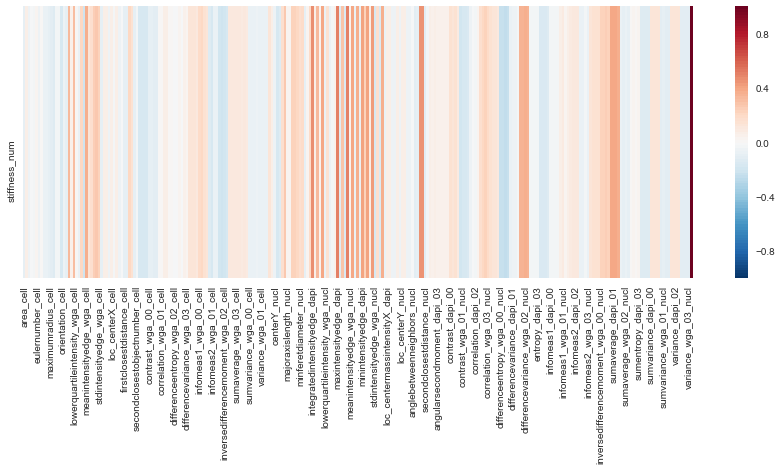

In [20]:
sns.heatmap(correlations[['stiffness_num']].T, cmap=sns.color_palette("RdBu_r", 100), vmin=-1, vmax=1);

### Explore groups of features

###### Cell shape

In [48]:
group = pd.concat([measurements.loc[:, 'eulernumber_cell' : 'maxferetdiameter_cell'], measurements_.stiffness_num], axis=1) 
print(group.shape)

(388, 6)


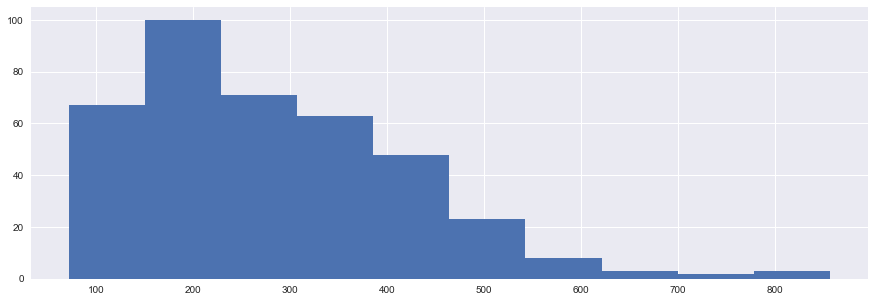

In [50]:
group['log_majoraxislength_cell'] = np.log(group['majoraxislength_cell'])
#group['log_eccentricity_cell'] = np.log(group['eccentricity_cell'])
group['majoraxislength_cell'].hist();

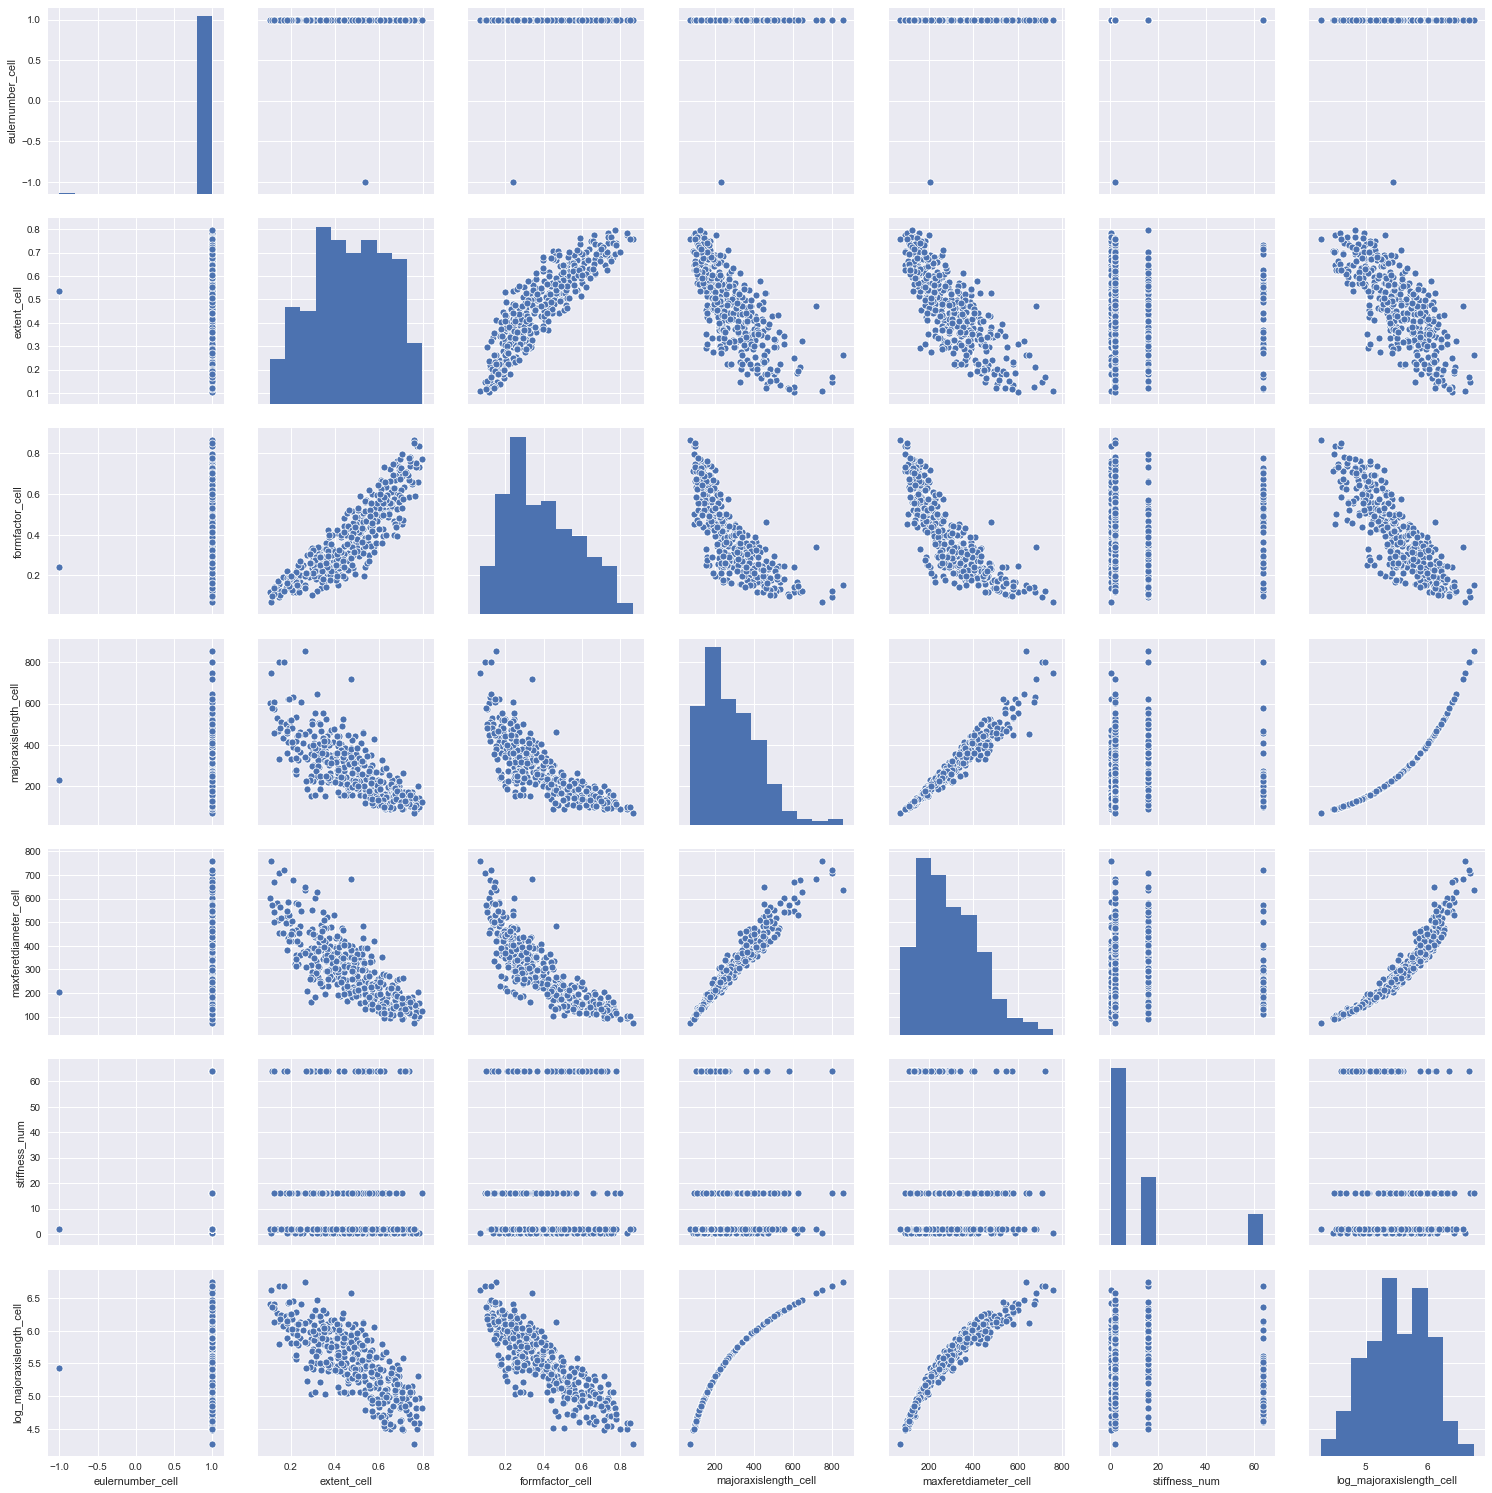

In [51]:
sns.pairplot(group, height=3);

### Correlation between features

In [ ]:
sns.set(rc={'figure.figsize':(15, 12)})
sns.heatmap(correlations, cmap=sns.color_palette("RdBu_r", 100), vmin=-1, vmax=1);

###### Regress `medianintensity_wga_cell` on `area_cell` and `meanintensity_wga_cell`

In [ ]:
initial_set = ['area_cell', 'meanintensity_wga_cell']
Xk = np.array(measurements[initial_set])
x = np.array(measurements.medianintensity_wga_cell)
Xk.shape, x.shape

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(Xk, x)
print(lin_reg.intercept_, lin_reg.coef_)
x_hat = lin_reg.predict(Xk)
u = x - x_hat

In [ ]:
print(correlations.loc['area_cell', 'medianintensity_wga_cell'])
plt.plot(Xk[:, 0], label='Initial set: Area cell');
plt.plot(x, label='New feature: Median intensity');
plt.legend();

In [ ]:
print(correlations.loc['meanintensity_wga_cell', 'medianintensity_wga_cell'])
plt.plot(Xk[:, 1], label='Initial set: Mean intensity');
plt.plot(x, label='New feature: Median intensity');
#plt.plot(x_hat, label='Prediction');
#plt.plot(u, label='Residual');
plt.legend();

In [ ]:
plt.plot(x, label='New feature: Median intensity');
plt.plot(x_hat, label='Prediction');
plt.plot(u, label='Residual');
plt.legend();

###### Create an artificial response variable and compare $R^2$

In [ ]:
def step_wise_regression(X):
    from sklearn.linear_model import LinearRegression
    
    y = X.sum(axis=1)
    print(X.shape, y.shape)

    lin_reg = LinearRegression()
    r2 = []
    for k in range(1,X.shape[1]):
        lin_reg.fit(X.iloc[:, 0:k], y)
        r2.append(lin_reg.score(X.iloc[:, 0:k], y))

    plt.plot(r2);

In [ ]:
step_wise_regression(measurements[feature_cols])

###### Delete columns that are highly correlated with others

In [61]:
def select_low_corr(X, y):
    corr = X.corr();
    cols = np.full((corr.shape[0],), True, dtype=bool)
    
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if abs(corr.iloc[i,j]) >= 0.9:
                if cols[j]:
                    cols[j] = False
    selected_cols = X.columns[cols]
    return selected_cols

In [62]:
selected_cols = select_low_corr(measurements_[feature_cols], measurements_.stiffness)
[measurements_.drop([col], axis=1, inplace=True) for col in feature_cols if col not in selected_cols]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [63]:
print("After feature selection the dataset has {} rows and {} columns.".format(measurements_.shape[0], 
                                                                               measurements_.shape[1]))
print(measurements_.dtypes.value_counts())
measurements_.head()

After feature selection the dataset has 388 rows and 113 columns.
float64     101
object        6
int64         5
category      1
dtype: int64


,label,image,object,combination,site,stiffness,well,area_cell,centerX_cell,centerY_cell,compactness_cell,eccentricity_cell,eulernumber_cell,extent_cell,formfactor_cell,majoraxislength_cell,maximumradius_cell,minferetdiameter_cell,orientation_cell,solidity_cell,integratedintensityedge_wga_cell,integratedintensity_wga_cell,lowerquartileintensity_wga_cell,madintensity_wga_cell,massdisplacement_wga_cell,maxintensityedge_wga_cell,maxintensity_wga_cell,meanintensityedge_wga_cell,meanintensity_wga_cell,minintensityedge_wga_cell,stdintensity_wga_cell,anglebetweenneighbors_cell,firstclosestdistance_cell,firstclosestobjectnumber_cell,numberofneighbors_cell,percenttouching_cell,secondclosestdistance_cell,secondclosestobjectnumber_cell,angularsecondmoment_wga_00_cell,contrast_wga_00_cell,correlation_wga_00_cell,correlation_wga_01_cell,correlation_wga_02_cell,correlation_wga_03_cell,differenceentropy_wga_00_cell,differencevariance_wga_00_cell,infomeas1_wga_00_cell,infomeas1_wga_01_cell,infomeas1_wga_02_cell,infomeas1_wga_03_cell,infomeas2_wga_00_cell,infomeas2_wga_01_cell,infomeas2_wga_02_cell,infomeas2_wga_03_cell,area_nucl,compactness_nucl,eccentricity_nucl,extent_nucl,formfactor_nucl,majoraxislength_nucl,maximumradius_nucl,orientation_nucl,solidity_nucl,integratedintensityedge_dapi,integratedintensityedge_wga_nucl,integratedintensity_dapi,integratedintensity_wga_nucl,lowerquartileintensity_dapi,lowerquartileintensity_wga_nucl,madintensity_dapi,madintensity_wga_nucl,massdisplacement_dapi,massdisplacement_wga_nucl,maxintensityedge_dapi,maxintensityedge_wga_nucl,maxintensity_dapi,meanintensityedge_dapi,meanintensityedge_wga_nucl,minintensityedge_wga_nucl,minintensity_wga_nucl,stdintensityedge_wga_nucl,stdintensity_dapi,stdintensity_wga_nucl,anglebetweenneighbors_nucl,numberofneighbors_nucl,secondclosestobjectnumber_nucl,angularsecondmoment_dapi_00,angularsecondmoment_wga_00_nucl,contrast_dapi_00,contrast_dapi_01,contrast_dapi_02,contrast_dapi_03,contrast_wga_00_nucl,correlation_dapi_00,correlation_dapi_01,correlation_dapi_02,correlation_dapi_03,correlation_wga_00_nucl,correlation_wga_01_nucl,correlation_wga_02_nucl,correlation_wga_03_nucl,differenceentropy_dapi_00,differenceentropy_wga_00_nucl,differencevariance_dapi_00,differencevariance_wga_00_nucl,entropy_dapi_00,entropy_wga_00_nucl,infomeas1_dapi_00,infomeas1_wga_00_nucl,infomeas2_dapi_00,infomeas2_wga_00_nucl,inversedifferencemoment_dapi_00,stiffness_num
0,0.2-B-A1-1-1,1,1,B,1,0.2,A1,33430,413.0,305.0,2.684507,0.971810,1.0,0.377506,0.253492,464.238111,59.808026,140.289024,18.221934,0.700927,20.437614,2461.255821,0.019654,0.034348,12.393819,0.207279,0.808164,0.018716,0.073624,0.001663,0.070427,35.582509,155.466385,3,1.0,0.261267,288.569689,4,0.004407,57.235155,0.911796,0.846214,0.874410,0.811905,3.496530,0.000621,-0.306484,-0.267233,-0.267458,-0.222884,0.983390,0.974339,0.974469,0.957916,4884,1.045043,0.653824,0.731685,0.760466,90.792229,33.105891,-11.110967,0.955025,49.936233,45.933913,1803.288198,818.936065,0.324392,0.143908,0.050599,0.020813,0.409020,0.552714,0.278706,0.422309,0.630655,0.208068,0.191391,0.019867,0.019867,0.080204,0.085462,0.038351,37.814789,0.0,4,0.000436,0.002190,244.404164,414.188663,269.329723,396.772397,45.053230,0.722651,0.533091,0.693571,0.548768,0.726816,0.553985,0.642327,0.552789,5.014393,3.806605,0.000196,0.000733,11.533256,9.410314,-0.185560,-0.148692,0.951569,0.882863,0.089149,0.2
1,0.2-B-A1-1-2,1,2,B,1,0.2,A1,17933,781.0,463.0,1.364020,0.859089,1.0,0.617528,0.427946,221.727175,48.010416,128.561238,3.503820,0.790679,12.841718,1659.621594,0.014607,0.054551,30.258221,0.154925,0.517998,0.020547,0.092546,0.002060,0.090860,77.687773,161.700632,5,1.0,0.355872,223.383341,6,0.005811,57.302920,0.947119,0.914696,0.933215,0.894014,3.739606,0.000802,-0.322180,-0.272621,-0.294305,-0.260111,0.988405,0.979474,0.984013,0.976275,3121,1.028667,0.585007,0.745047,0.818652,70.153350,28.635642,-16.216357,0.963272,39.279255,41.664958,1415.663464,659.475029,0.336847,0.178408,0.1

In [64]:
# Redefine numeric columns and feature columns
numeric_cols = measurements_.select_dtypes(include=[np.number]).columns
feature_cols = measurements_.select_dtypes(include=[np.number]).drop(['stiffness_num'], axis=1).columns

## Normalisation

In [40]:
measurements_norm = measurements_.copy()
# Standardise the entire dataset
measurements_norm[feature_cols] = (measurements_norm[feature_cols] - measurements_norm[feature_cols].mean()) / measurements_norm[feature_cols].std()
measurements_norm.head(3)

,label,image,object,combination,site,stiffness,well,area_cell,centerX_cell,centerY_cell,compactness_cell,eccentricity_cell,eulernumber_cell,extent_cell,formfactor_cell,majoraxislength_cell,maxferetdiameter_cell,maximumradius_cell,meanradius_cell,medianradius_cell,minferetdiameter_cell,minoraxislength_cell,orientation_cell,perimeter_cell,solidity_cell,integratedintensityedge_wga_cell,integratedintensity_wga_cell,lowerquartileintensity_wga_cell,madintensity_wga_cell,massdisplacement_wga_cell,maxintensityedge_wga_cell,maxintensity_wga_cell,meanintensityedge_wga_cell,meanintensity_wga_cell,medianintensity_wga_cell,minintensityedge_wga_cell,minintensity_wga_cell,stdintensityedge_wga_cell,stdintensity_wga_cell,upperquartileintensity_wga_cell,loc_centermassintensityX_wga_cell,loc_centermassintensityY_wga_cell,loc_centerX_cell,loc_centerY_cell,loc_maxintensityX_wga_cell,loc_maxintensityY_wga_cell,anglebetweenneighbors_cell,firstclosestdistance_cell,firstclosestobjectnumber_cell,numberofneighbors_cell,percenttouching_cell,secondclosestdistance_cell,secondclosestobjectnumber_cell,angularsecondmoment_wga_00_cell,angularsecondmoment_wga_01_cell,angularsecondmoment_wga_02_cell,angularsecondmoment_wga_03_cell,contrast_wga_00_cell,contrast_wga_01_cell,contrast_wga_02_cell,contrast_wga_03_cell,correlation_wga_00_cell,correlation_wga_01_cell,correlation_wga_02_cell,correlation_wga_03_cell,differenceentropy_wga_00_cell,differenceentropy_wga_01_cell,differenceentropy_wga_02_cell,differenceentropy_wga_03_cell,differencevariance_wga_00_cell,differencevariance_wga_01_cell,differencevariance_wga_02_cell,differencevariance_wga_03_cell,entropy_wga_00_cell,entropy_wga_01_cell,entropy_wga_02_cell,entropy_wga_03_cell,infomeas1_wga_00_cell,infomeas1_wga_01_cell,infomeas1_wga_02_cell,infomeas1_wga_03_cell,infomeas2_wga_00_cell,infomeas2_wga_01_cell,infomeas2_wga_02_cell,infomeas2_wga_03_cell,inversedifferencemoment_wga_00_cell,inversedifferencemoment_wga_01_cell,inversedifferencemoment_wga_02_cell,inversedifferencemoment_wga_03_cell,sumaverage_wga_00_cell,sumaverage_wga_01_cell,sumaverage_wga_02_cell,sumaverage_wga_03_cell,sumentropy_wga_00_cell,sumentropy_wga_01_cell,sumentropy_wga_02_cell,sumentropy_wga_03_cell,sumvariance_wga_00_cell,sumvariance_wga_01_cell,sumvariance_wga_02_cell,sumvariance_wga_03_cell,variance_wga_00_cell,variance_wga_01_cell,variance_wga_02_cell,variance_wga_03_cell,area_nucl,centerX_nucl,centerY_nucl,compactness_nucl,eccentricity_nucl,extent_nucl,formfactor_nucl,majoraxislength_nucl,maxferetdiameter_nucl,maximumradius_nucl,meanradius_nucl,medianradius_nucl,minferetdiameter_nucl,minoraxislength_nucl,orientation_nucl,perimeter_nucl,solidity_nucl,integratedintensityedge_dapi,integratedintensityedge_wga_nucl,integratedintensity_dapi,integratedintensity_wga_nucl,lowerquartileintensity_dapi,lowerquartileintensity_wga_nucl,madintensity_dapi,madintensity_wga_nucl,massdisplacement_dapi,massdisplacement_wga_nucl,maxintensityedge_dapi,maxintensityedge_wga_nucl,maxintensity_dapi,maxintensity_wga_nucl,meanintensityedge_dapi,meanintensityedge_wga_nucl,meanintensity_dapi,meanintensity_wga_nucl,medianintensity_dapi,medianintensity_wga_nucl,minintensityedge_dapi,minintensityedge_wga_nucl,minintensity_dapi,minintensity_wga_nucl,stdintensityedge_dapi,stdintensityedge_wga_nucl,stdintensity_dapi,stdintensity_wga_nucl,upperquartileintensity_dapi,upperquartileintensity_wga_nucl,loc_centermassintensityX_dapi,loc_centermassintensityX_wga_nucl,loc_centermassintensityY_dapi,loc_centermassintensityY_wga_nucl,loc_centerX_nucl,loc_centerY_nucl,loc_maxintensityX_dapi,loc_maxintensityX_wga_nucl,loc_maxintensityY_dapi,loc_maxintensityY_wga_nucl,anglebetweenneighbors_nucl,firstclosestdistance_nucl,firstclosestobjectnumber_nucl,numberofneighbors_nucl,percenttouching_nucl,secondclosestdistance_nucl,secondclosestobjectnumber_nucl,angularsecondmoment_dapi_00,angularsecondmoment_dapi_01,angularsecondmoment_dapi_02,angularsecondmoment_dapi_03,angularsecondmoment_wga_00_n

### Visualise all the features

In [ ]:
sns.set(rc={'figure.figsize':(15, 12)})

sns.heatmap(measurements_norm[feature_cols],
            vmin = -2, vmax = 2,
            cmap=sns.color_palette("RdBu_r", 100),
            cbar_kws={"aspect": 20},
            xticklabels=False, yticklabels=False);

plt.savefig('../results/Feature heatmap.png', bbox_inches='tight', dpi=300);

### Visualise aggregated values

In [ ]:
sns.set(rc={'figure.figsize':(15, 3)})

mean_per_stiffness = measurements_norm.groupby('stiffness')[feature_cols].mean()

sns.heatmap(mean_per_stiffness, 
            vmin = -1, vmax = 1,
            cmap=sns.color_palette("PRGn", 100), 
            cbar_kws={"aspect": 5},
            xticklabels=False, yticklabels=True);

plt.savefig('../results/Aggregated heatmap.png', bbox_inches='tight', dpi=300);

In [ ]:
# Too many features, do not run this!
# sns.pairplot(nuclei_norm, height=3, x_vars=["stiffness"], y_vars=nuclei_norm.columns);

## Clustering

> `sns.clustermap(metric="correlation")` doesn't work. Will getting rid of redundant features help?

In [ ]:
sns.clustermap(measurements_norm[feature_cols], 
               metric='euclidean', method='ward', 
               col_cluster=False,
               cmap=sns.color_palette('RdBu_r', 100), robust=True);

In [ ]:
#sns.color_palette("Paired", len(stiffness_levels))
# Prepare a vector of colours mapped to the 'stiffness' column
my_palette = dict(zip(measurements_norm.stiffness.unique(), sns.color_palette("Set3", 4)))
row_colors = measurements_norm.stiffness.map(my_palette)

sns.clustermap(measurements_norm[feature_cols], 
               metric='euclidean', method='ward', 
               col_cluster=False,
               cmap=sns.color_palette('RdBu_r', 100), robust=True, 
               row_colors=row_colors);

#plt.savefig('../results/Clustering.png', bbox_inches='tight', dpi=300);

In [ ]:
print(my_palette.keys())
sns.palplot(my_palette.values())

## PCA

In [65]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
X = measurements_.loc[:, feature_cols].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(388, 105)

In [66]:
from sklearn.decomposition import PCA

n_components = 50
# Create a PCA object
pca = PCA(n_components=n_components)

# Apply PCA to the scaled feature matrix
principal_components = pca.fit_transform(X_scaled)

pc_cols = [('pc_' + str(i)) for i in range(1, n_components + 1)]
pc_df = pd.concat([measurements_.loc[:, 'label' : 'well'],
                  pd.DataFrame(data = principal_components, columns = pc_cols)], 
                  axis=1)

pc_df.shape

(388, 57)

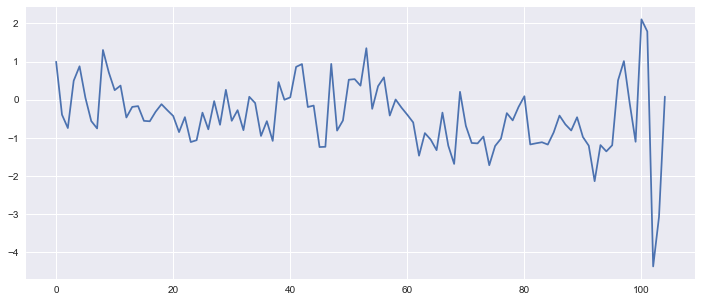

In [67]:
plt.rcParams['figure.figsize'] = (12, 5)

plt.plot(X_scaled[0]);

In [68]:
print(pca.explained_variance_.shape)
print("Percentage of explained variance:\n", 100 - pca.explained_variance_)
n_pc = sum(100 - pca.explained_variance_ < 98.0) + 1
print("\nThe first {} principal components explain {} variance".
      format(n_pc, 100 - pca.explained_variance_[n_pc-1]))

(50,)
Percentage of explained variance:
 [82.02051861 89.05692053 91.19971891 92.30882247 94.88548239 94.97453599
 96.22841392 96.36014234 96.66208588 97.04262291 97.09481231 97.458744
 97.72621678 98.0700692  98.18324908 98.44208931 98.5364494  98.74625855
 98.80029275 98.85303615 98.89524971 99.05706265 99.1115469  99.12860871
 99.21637104 99.27712774 99.30844814 99.35181036 99.36679895 99.41259765
 99.44015331 99.48960807 99.51119653 99.54159673 99.55874895 99.57148453
 99.60320548 99.63691035 99.66196152 99.67387847 99.68767693 99.70928612
 99.71772475 99.7277502  99.74671245 99.74768882 99.76507629 99.76913523
 99.77649441 99.79231671]

The first 14 principal components explain 98.07006919642002 variance


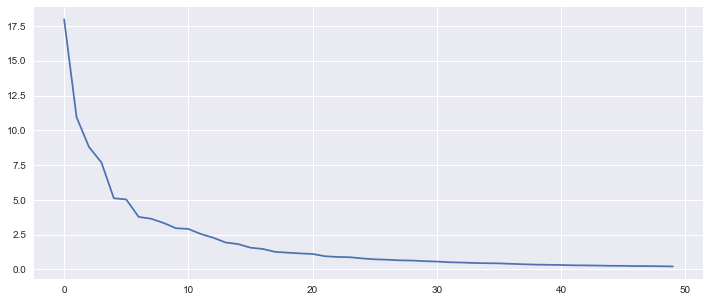

In [69]:
plt.plot(pca.explained_variance_);

#plt.savefig('../results/Explained variance.png', bbox_inches='tight', dpi=300);

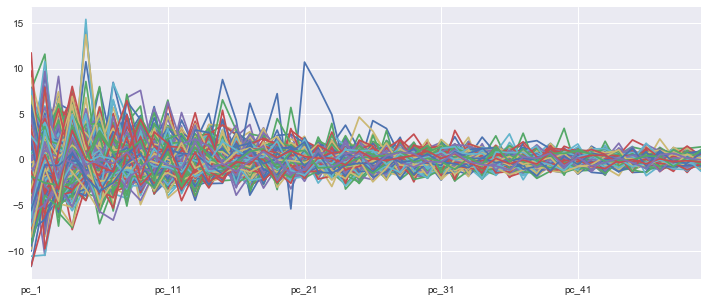

In [70]:
pc_df[pc_cols].T.plot(legend=False);

#plt.savefig('../results/Principal components.png', bbox_inches='tight', dpi=300);

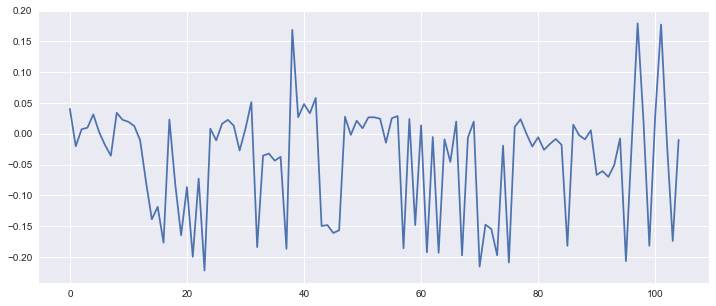

In [71]:
plt.plot(pca.components_[0]);

In [83]:
first_component = zip(measurements_.columns, pca.components_[0])

for col, weight in first_component:
    if (weight >0.15) or (weight < -0.20):
        print(col, weight)

madintensity_wga_cell -0.22181965555024175
angularsecondmoment_wga_00_cell 0.1687120894487691
madintensity_wga_nucl -0.21555216764894222
maxintensity_dapi -0.2088774957524394
correlation_dapi_02 -0.20677319615608009
correlation_wga_00_nucl 0.17922601149549683
differenceentropy_dapi_00 0.17729463612097138


In [ ]:
my_palette = dict(zip(pc_df.stiffness.unique(), sns.color_palette("Set3", 4)))
row_colors = pc_df.stiffness.map(my_palette)

sns.clustermap(pc_df.loc[:,'pc_1' : 'pc_50'], 
               metric='euclidean', method='ward', 
               col_cluster=False,
               cmap=sns.color_palette('RdBu_r', 40), robust=True, 
               row_colors=row_colors);

# plt.savefig('../results/PCA Clustering.png', bbox_inches='tight', dpi=300);

In [ ]:
print(my_palette.keys())
sns.palplot(my_palette.values())

### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = measurements_[feature_cols]
y = measurements_.stiffness
 
X.shape, y.shape

((388, 105), (388,))

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape, X_test.shape

((291, 105), (97, 105))

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)

In [103]:
feature_importance = zip(measurements_.columns, rfc.feature_importances_)

for col, weight in feature_importance:
    if (weight > 0.02):
        print(col, weight)

formfactor_cell 0.026290466138210355
lowerquartileintensity_wga_cell 0.038916674987424384
meanintensityedge_wga_cell 0.027285012549088883
numberofneighbors_cell 0.02115087730416416
eccentricity_nucl 0.042204553273010086
formfactor_nucl 0.024869806799183332
maximumradius_nucl 0.031896550211323774
integratedintensity_wga_nucl 0.020607936134858396
madintensity_dapi 0.02804121918324929


## Biomarkers

### Load and parse the data

In [ ]:
biomarkers = load_data(filename='Biomarkers_Cells.csv')
biomarkers.head()

In [ ]:
clean_metadata(biomarkers)
biomarkers.head(3)

In [ ]:
biomarkers = move_column(biomarkers, 'label')
biomarkers.head(3)

In [ ]:
print(biomarkers.shape)
list(biomarkers.columns)

In [ ]:
drop_cols = ['Location_Center_X', 'Location_Center_Y', 'Location_Center_Z',
             'Number_Object_Number', 'Parent_Nuclei']
biomarkers.drop(drop_cols, axis=1, inplace=True)

### Missing values?

In [ ]:
# Are there any missing values?
print(biomarkers.isnull().sum().sum())

### Descriptive statistics

In [ ]:
stats = biomarkers.describe()
stats

### Drop the features with zero variance

In [ ]:
biomarkers.drop(stats.columns[stats.loc['std', :] == 0], axis=1, inplace=True)

In [ ]:
print("New shape is: {}".format(biomarkers.shape))
biomarkers.dtypes.value_counts()

### Create dataframes for Keratin and Vimentin

In [ ]:
ker_cols = [col for col in biomarkers.columns if 'OrigKer' in col]
print(len(ker_cols))

In [ ]:
vim_cols = [col for col in biomarkers.columns if 'OrigVim' in col]
print(len(vim_cols))

In [ ]:
keratin = biomarkers.copy()
keratin.drop(vim_cols, axis=1, inplace=True)

print(keratin.shape)
keratin.head(3)

In [ ]:
vimentin = biomarkers.copy()
vimentin.drop(ker_cols, axis=1, inplace=True)

print(vimentin.shape)
vimentin.head(3)

### Correlations between features

#### Keratin

In [ ]:
keratin_ = keratin.copy()
keratin_['stiffness_num'] = pd.to_numeric(keratin_.stiffness)

In [ ]:
correlations = keratin_.corr();
correlations.stiffness_num

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.heatmap(correlations, cmap=sns.color_palette("PRGn_r", 100), vmin=-1, vmax=1);

plt.savefig('../results/Keratin Correlations.png', bbox_inches='tight', dpi=300);

#### Vimentin

In [ ]:
vimentin_ = vimentin.copy()
vimentin_['stiffness_num'] = pd.to_numeric(vimentin_.stiffness)

In [ ]:
correlations = vimentin_.corr();
correlations.stiffness_num

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.heatmap(correlations, cmap=sns.color_palette("PRGn_r", 100), vmin=-1, vmax=1);

plt.savefig('../results/Vimentin Correlations.png', bbox_inches='tight', dpi=300);

### Intensity by stiffness

#### Keratin

In [ ]:
keratin['total_px'] = keratin['Intensity_IntegratedIntensity_OrigKer'] / keratin['Intensity_MeanIntensity_OrigKer']
keratin['edge_px'] = keratin['Intensity_IntegratedIntensityEdge_OrigKer'] / keratin['Intensity_MeanIntensityEdge_OrigKer']

In [ ]:
keratin.head(3)

In [ ]:
keratin['IntegratedIntensityInner'] = keratin['Intensity_IntegratedIntensity_OrigKer'] - keratin['Intensity_IntegratedIntensityEdge_OrigKer']

keratin['MeanIntensityInner'] = keratin['IntegratedIntensityInner'] / (keratin['total_px'] - keratin['edge_px'])

In [ ]:
intensity_cols = ['Intensity_IntegratedIntensity_OrigKer', 
                  'IntegratedIntensityInner', 
                  'Intensity_IntegratedIntensityEdge_OrigKer']

fig, ax = plt.subplots()
keratin.groupby('stiffness')[intensity_cols].mean().plot(kind='bar', 
                                                         title="Integrated intensity of Cytokeratin", 
                                                         fontsize=14,
                                                         ax=ax);
ax.legend(["Integrated Intensity", "Integrated Inner Intensity", "Integrated Edge Intensity"], fontsize=14);

In [ ]:
intensity_cols = ['Intensity_MeanIntensity_OrigKer', 
                  'MeanIntensityInner', 
                  'Intensity_MeanIntensityEdge_OrigKer']

fig, ax = plt.subplots()
keratin.groupby('stiffness')[intensity_cols].mean().plot(kind='bar', 
                                                         title="Mean intensity of Cytokeratin", 
                                                         fontsize=14,
                                                         ax=ax);
ax.legend(["Mean Intensity", "Mean Inner Intensity", "Mean Edge Intensity"], fontsize=14);

plt.savefig('../results/Cytokeratin Mean Intensity.png', bbox_inches='tight', dpi=300);

#### Vimentin

In [ ]:
vimentin['total_px'] = vimentin['Intensity_IntegratedIntensity_OrigVim'] / vimentin['Intensity_MeanIntensity_OrigVim']
vimentin['edge_px'] = vimentin['Intensity_IntegratedIntensityEdge_OrigVim'] / vimentin['Intensity_MeanIntensityEdge_OrigVim']

In [ ]:
vimentin.head(3)

In [ ]:
vimentin['IntegratedIntensityInner'] = vimentin['Intensity_IntegratedIntensity_OrigVim'] - vimentin['Intensity_IntegratedIntensityEdge_OrigVim']

vimentin['MeanIntensityInner'] = vimentin['IntegratedIntensityInner'] / (vimentin['total_px'] - vimentin['edge_px'])

In [ ]:
intensity_cols = ['Intensity_IntegratedIntensity_OrigVim', 
                  'IntegratedIntensityInner', 
                  'Intensity_IntegratedIntensityEdge_OrigVim']

fig, ax = plt.subplots()
vimentin.groupby('stiffness')[intensity_cols].mean().plot(kind='bar', 
                                                         title="Integrated intensity of Vimentin", 
                                                         fontsize=14,
                                                         ax=ax);
ax.legend(["Integrated Intensity", "Integrated Inner Intensity", "Integrated Edge Intensity"], fontsize=14);

In [ ]:
intensity_cols = ['Intensity_MeanIntensity_OrigVim', 
                  'MeanIntensityInner', 
                  'Intensity_MeanIntensityEdge_OrigVim']

fig, ax = plt.subplots()
vimentin.groupby('stiffness')[intensity_cols].mean().plot(kind='bar', 
                                                         title="Mean intensity of Vimentin", 
                                                         fontsize=14,
                                                         ax=ax);
ax.legend(["Mean Intensity", "Mean Inner Intensity", "Mean Edge Intensity"], fontsize=14);

plt.savefig('../results/Vimentin Mean Intensity.png', bbox_inches='tight', dpi=300);

### Normalise signal and compare

In [ ]:
max_ker = keratin[['Intensity_MeanIntensity_OrigKer']].max()
max_ker

In [ ]:
keratin[['Intensity_MeanIntensity_OrigKer']].head()